In [30]:
from selenium import webdriver
import pandas as pd
import time
import itertools
import pprint
import json
import re
from IPython.display import display
from IPython.display import clear_output
from matplotlib import pyplot as plt
pd.set_option('display.max_colwidth', -1)
# plt.rcParams['figure.figsize'] = [15, 7.5]

In [2]:
driver = webdriver.Chrome('/usr/bin/chromedriver')

# get all settlements links

In [7]:
driver.get('https://www.gov.il/he/departments/news/?OfficeId=104cb0f4-d65a-4692-b590-94af928c19c0&limit=10&topic=3ef9cac8-a1a9-4352-91d4-860efd3b720d&subTopic=626a30f9-8b50-495a-9b9f-e4ce4b433ca5')

In [8]:
settlements_url_list_of_lists = []
while True:
    series = pd.Series(driver.page_source.split(' '))
    settlements_url_list = series[series.str.contains('departments/news/') & ~series.str.contains('\?')].apply(lambda x: x[6:-1]).tolist()
    print('number of settlements:', len(settlements_url_list))
    settlements_url_list_of_lists.append(settlements_url_list)
    element = driver.find_elements_by_xpath("//div[contains(@class, 'button-gov blue xs-pl-5 xs-pr-5')]")[1]
    if element.is_displayed():
        element.click()
        time.sleep(0.5)
    else:
        break

number of settlements: 10
number of settlements: 10
number of settlements: 10
number of settlements: 10
number of settlements: 10
number of settlements: 10
number of settlements: 10
number of settlements: 10
number of settlements: 10
number of settlements: 10
number of settlements: 10
number of settlements: 10
number of settlements: 10
number of settlements: 10
number of settlements: 10
number of settlements: 10
number of settlements: 10
number of settlements: 10
number of settlements: 10
number of settlements: 10
number of settlements: 10
number of settlements: 10
number of settlements: 10
number of settlements: 10
number of settlements: 10
number of settlements: 10
number of settlements: 10
number of settlements: 10
number of settlements: 1


In [9]:
all_settlements_list = list(itertools.chain.from_iterable(settlements_url_list_of_lists))
print(len(all_settlements_list))
temp_settlements_series = pd.Series(all_settlements_list)
all_settlements_series = pd.Series(temp_settlements_series.unique())
display(all_settlements_series.shape)
display(all_settlements_series.head())

281


(281,)

0    https://www.gov.il/he/departments/news/tayibe-corona        
1    https://www.gov.il/he/departments/news/hora-corona          
2    https://www.gov.il/he/departments/news/beer-sheva-corona    
3    https://www.gov.il/he/departments/news/elad-corona          
4    https://www.gov.il/he/departments/news/kiryat-malakhi-corona
dtype: object

In [10]:
all_settlements_csv_path = './all_settlements_links.csv'
all_settlements_series.to_csv(all_settlements_csv_path, index=False, header=False)
# all_settlements_series = pd.read_csv(all_settlements_csv_path, header=None)[0]
display(all_settlements_series.head())
display(all_settlements_series.shape)

0    https://www.gov.il/he/departments/news/tayibe-corona        
1    https://www.gov.il/he/departments/news/hora-corona          
2    https://www.gov.il/he/departments/news/beer-sheva-corona    
3    https://www.gov.il/he/departments/news/elad-corona          
4    https://www.gov.il/he/departments/news/kiryat-malakhi-corona
dtype: object

(281,)

# get settlements datums

In [11]:
def get_settlement_data(driver):
    main_xpath = '//div[@class=\'margin-for-ul txt dark-gray-txt lg-mb-30 tbl-accesabilty tbl-responsive sub-links-permanent-underline\']//'
    xpath = f'{main_xpath}h3 | {main_xpath}h2 | {main_xpath}p | {main_xpath}li'
    elements_list = driver.find_elements_by_xpath(xpath)
    datum_list = [element.text for element in elements_list]
    b = pd.Series(datum_list)
    datum_clean_list = b[:b[b.str.contains('הנחיות לציבור')].index[0]].tolist()
    return datum_clean_list

In [12]:
all_settlements_dict = {}

for index, settlement_link in enumerate(all_settlements_series):      
    if not re.search('[a-zA-Z]', settlement_link.split('/')[-1]):
        continue
    driver.get(settlement_link)
    time.sleep(0.25)
    clear_output(wait=True) 
    settlement_datum_list = get_settlement_data(driver)
    all_settlements_dict[settlement_link] = {'title': driver.title, 'datum': settlement_datum_list}    
    print(f'{index + 1} / {len(all_settlements_series)}: {settlement_link}')
    print(all_settlements_dict[settlement_link])

280 / 281: https://www.gov.il/he/departments/news/nof-hagalil-corona
{'title': 'נוף הגליל - מקומות בהם שהו חולי קורונה | משרד הבריאות', 'datum': ['מקומות בהם שהו חולי קורונה בנוף הגליל', 'תאריך עדכון: 20/04/2020', '16/04/2020 14:00 16/04/2020 14:45 משהדאוי קינג סטור המוביל נוף הגליל', '16/04/2020 12:30 16/04/2020 13:45 מרכאזה העבודה 1 נוף הגליל', '14/04/2020 14:00 14/04/2020 16:00 מרכאזה העבודה 1 נוף הגליל', 'תאריך עדכון: 17/04/2020', '11.4.20, 12:00-13:00 - רשת המזון"MERKAZA", נוף הגליל', '11.4.20, 12:00-13:00 - רשת מזון"MERKAZA", נוף הגליל', 'תאריך עדכון 11/04/2020', '4.4.20, 13:00-14:00 - מרכז המזון, נוף הגליל', '29.3.20, 8:00-18:00 - עיריית נוף הגליל, נוף הגליל', 'תאריך עדכון 05/04/2020', '29.3.2020 16:30 - 17:30 בית העלין נוף הגליל', 'תאריך עדכון: 01/04/2020', '24/3/2020 20:30 - 21:30 אושר עד', '25/3/2020 19:00 - 21:30 עיריית נוף הגליל - אריזת אוכל לקשישים', 'תאריך עדכון: 31/03/2020', '18/03/2020 16:00 -18:00 סופרמרקט אושר עד נוף הגליל', 'תאריך עדכון: 24/03/2020 22:00', "13.3 09:0

In [13]:
json_path = 'all_settlements_dict.json'
with open(json_path, 'w') as fp:
    json.dump(all_settlements_dict, fp)
# with open(json_path, 'r') as fp:
#     all_settlements_dict = json.load(fp)

# extract incident date

In [14]:
def get_update_date_if_update(row):
    if 'עדכון' in re.findall('עדכון|עודכן', row['raw']):
        return get_date_from_string(row['raw'])
    else:
        return None

In [15]:
def get_date_from_string(string):
    date_strings_list = re.findall('\d{1,2}\.\d{1,2}\.\d{1,4}|\d{1,2}/\d{1,2}/\d\d', string)
    if date_strings_list:
        if date_strings_list[0] == '30.30.2020':
            date_strings_list[0] = '30.3.2020'        
#         print(string, date_strings_list[0])
        date = pd.to_datetime(date_strings_list[0], dayfirst=True)
    else:
        date_strings_list_2 = re.findall('\d{1,2}\.\d{1,2}', string)
        if date_strings_list_2:
            if date_strings_list_2[0] == '24.32':
                date_strings_list_2[0] = '24.3'
            date = pd.to_datetime(date_strings_list_2[0] + '.20', dayfirst=True)
        else:
            date = None
    return date

In [16]:
def get_settlement_df(settlement_link, settlement_dict):
    settlement_name = " ".join(settlement_dict['title'].split()[:-9])
    df = pd.Series(settlement_dict['datum']).to_frame('raw')
    df['update_date_temp'] = df.apply(get_update_date_if_update, axis=1)
    df['update_date'] = df['update_date_temp'].ffill()
    clean_df = df[~df['update_date_temp'].notna()][['raw', 'update_date']].dropna(subset=['update_date'])
    clean_df['incident_day'] = clean_df['raw'].apply(get_date_from_string)
    clean_df['settlement_name'] = settlement_name
    clean_df['settlement_link'] = settlement_link
    return clean_df

In [17]:
temp_df = [get_settlement_df(key, value) for key, value in all_settlements_dict.items()]
incidents_df = pd.concat(temp_df).reset_index(drop=True)
incidents_df.head()

,raw,update_date,incident_day,settlement_name,settlement_link
0,"27.4.20, 17:00-17:30 - סופר עאמד, טייבה",2020-05-02,2020-04-27,טייבה,https://www.gov.il/he/departments/news/tayibe-corona
1,"26.4.20, 17:00-17:30 - סופר עאמד, טייבה",2020-05-02,2020-04-26,טייבה,https://www.gov.il/he/departments/news/tayibe-corona
2,"12/04/2020 18:30 - 18:45 בית מרקחת מג'אד פארם, טייבה",2020-04-24,2020-04-12,טייבה,https://www.gov.il/he/departments/news/tayibe-corona
3,"12/04/2020 18:00 - 18:30 סופר בראון טייבה, אלשל 1, טייבה",2020-04-24,2020-04-12,טייבה,https://www.gov.il/he/departments/news/tayibe-corona
4,14/04/2020 20:45-21:10 מרכז רפואי אלראזי כביש 26 טייבה טייבה,2020-04-23,2020-04-14,טייבה,https://www.gov.il/he/departments/news/tayibe-corona


In [18]:
all_settlements_links_series = pd.Series(list(all_settlements_dict.keys()))
all_settlements_links_series.head()

0    https://www.gov.il/he/departments/news/tayibe-corona        
1    https://www.gov.il/he/departments/news/hora-corona          
2    https://www.gov.il/he/departments/news/beer-sheva-corona    
3    https://www.gov.il/he/departments/news/elad-corona          
4    https://www.gov.il/he/departments/news/kiryat-malakhi-corona
dtype: object

In [19]:
all_settlements_links_set = set(all_settlements_links_series)
incidents_settlement_links_set = set(incidents_df['settlement_link'])

In [20]:
all_settlements_links_set.difference(incidents_settlement_links_set)

{'https://www.gov.il/he/departments/news/bukaata-corona',
 'https://www.gov.il/he/departments/news/dvira-corona',
 'https://www.gov.il/he/departments/news/ein-hanatziv-corona',
 'https://www.gov.il/he/departments/news/gaash-corona',
 'https://www.gov.il/he/departments/news/givat-yearim-corona',
 'https://www.gov.il/he/departments/news/glil-yam-corona',
 'https://www.gov.il/he/departments/news/kfar-akeb-corona',
 'https://www.gov.il/he/departments/news/kfar-monash-corona',
 'https://www.gov.il/he/departments/news/leavim-corona',
 'https://www.gov.il/he/departments/news/magal-corona',
 'https://www.gov.il/he/departments/news/misgav-corona',
 'https://www.gov.il/he/departments/news/mitzpe-hoshaya-corona',
 'https://www.gov.il/he/departments/news/nof-haemek-corona',
 'https://www.gov.il/he/departments/news/ora-corona',
 'https://www.gov.il/he/departments/news/oranit-corona',
 'https://www.gov.il/he/departments/news/rachels-tomb-corona',
 'https://www.gov.il/he/departments/news/sdot-yam-cor

In [21]:
incidents_df['incident_day'].describe()

count     10915              
unique    68                 
top       2020-03-25 00:00:00
freq      637                
first     2020-01-04 00:00:00
last      2020-07-04 00:00:00
Name: incident_day, dtype: object

In [22]:
incidents_df[incidents_df['incident_day'] == '2020-04-29']

,raw,update_date,incident_day,settlement_name,settlement_link
14,"29.4.20, 12:30-13:00 - קופ""ח כללית חורה ב', חורה",2020-05-02,2020-04-29,חורה,https://www.gov.il/he/departments/news/hora-corona
5984,"29/04/2020 6:30 - 17:15 חדר לידה 1 הדסה עין כרם, ירושלים",2020-05-01,2020-04-29,ירושלים והסביבה,https://www.gov.il/he/departments/news/jerusalem-corona
10786,29.4.2020 19:00 - 20:00 מחסני השוק מיתרים,2020-04-05,2020-04-29,שמעה,https://www.gov.il/he/departments/news/shomaa-corona


In [23]:
incidents_df[incidents_df['incident_day'] == '2020-07-04']

,raw,update_date,incident_day,settlement_name,settlement_link
4882,המראה 4/7/2020 0:25 - נחיתה 4/7/2020 5:00 מס' טיסה 861 ישראייר מרוסיה דומודיידוב ל - ישראל בן גוריון,2020-04-12,2020-07-04,,https://www.gov.il/he/departments/news/flights-corona


In [24]:
incidents_csv_path = './incidents.csv'
incidents_df.to_csv(incidents_csv_path, index=False)
# incidents_df = pd.read_csv(incidents_csv_path, parse_dates=['update_date', 'incident_day']).dropna()
incidents_df.head()

,raw,update_date,incident_day,settlement_name,settlement_link
0,"27.4.20, 17:00-17:30 - סופר עאמד, טייבה",2020-05-02,2020-04-27,טייבה,https://www.gov.il/he/departments/news/tayibe-corona
1,"26.4.20, 17:00-17:30 - סופר עאמד, טייבה",2020-05-02,2020-04-26,טייבה,https://www.gov.il/he/departments/news/tayibe-corona
2,"12/04/2020 18:30 - 18:45 בית מרקחת מג'אד פארם, טייבה",2020-04-24,2020-04-12,טייבה,https://www.gov.il/he/departments/news/tayibe-corona
3,"12/04/2020 18:00 - 18:30 סופר בראון טייבה, אלשל 1, טייבה",2020-04-24,2020-04-12,טייבה,https://www.gov.il/he/departments/news/tayibe-corona
4,14/04/2020 20:45-21:10 מרכז רפואי אלראזי כביש 26 טייבה טייבה,2020-04-23,2020-04-14,טייבה,https://www.gov.il/he/departments/news/tayibe-corona


# statistics

In [25]:
incidents_stat_df = incidents_df.groupby('incident_day').size().to_frame('size').reset_index()

In [26]:
incidents_clean_stat_df = incidents_stat_df[(incidents_stat_df['incident_day'] >= '2020-03-01') & (incidents_stat_df['incident_day'] <= '2020-05-02')]
incidents_clean_stat_df.tail(10)

,incident_day,size
57,2020-04-21,45
58,2020-04-22,51
59,2020-04-23,30
60,2020-04-24,23
61,2020-04-25,6
62,2020-04-26,15
63,2020-04-27,21
64,2020-04-28,10
65,2020-04-29,3
66,2020-04-30,8


<IPython.core.display.Javascript object>


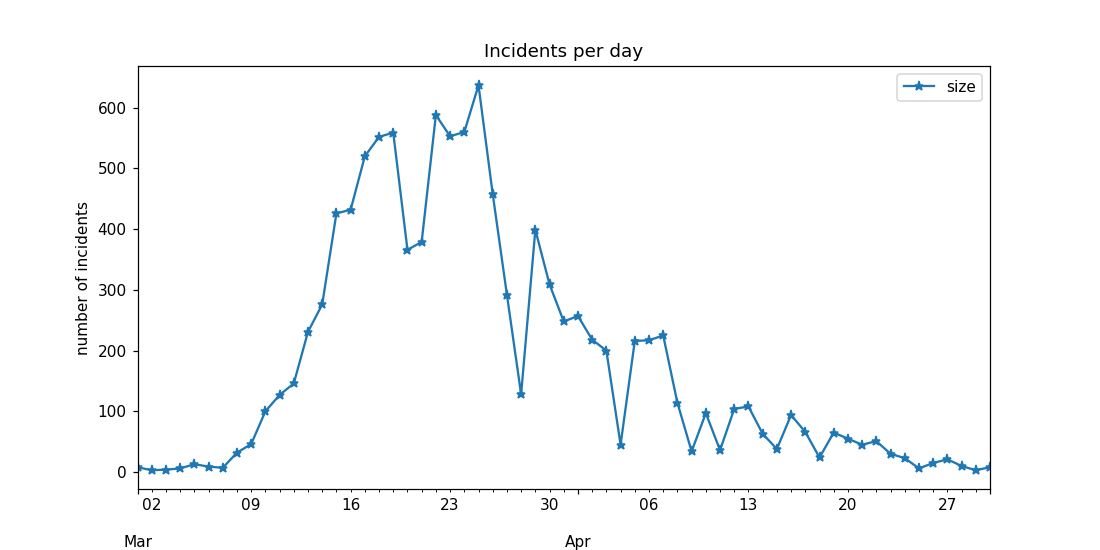

Text(0, 0.5, 'number of incidents')

In [32]:
%matplotlib notebook
plt.rcParams['figure.figsize'] = [10, 5]
incidents_clean_stat_df.plot(x='incident_day', y='size', marker='*')
plt.title('Incidents per day')
plt.xlabel('date')
plt.ylabel('number of incidents')

# Cities

In [33]:
def check_name(df, name):
    settlement_names_series = df['settlement_name']
    return settlement_names_series[settlement_names_series.str.contains(name)].unique()

In [34]:
def show_stat(df, settlement_name):
    print(check_name(df, settlement_name))
    settlement_df = df[df['settlement_name'].str.contains(settlement_name)]
    stat_df = settlement_df.groupby('incident_day').size().to_frame('size').reset_index()
    stat_df.plot(x='incident_day', y='size', marker='*')
    plt.title('Incidents per day')
    plt.xlabel('date')
    plt.ylabel('number of incidents')

['בני ברק']


<IPython.core.display.Javascript object>


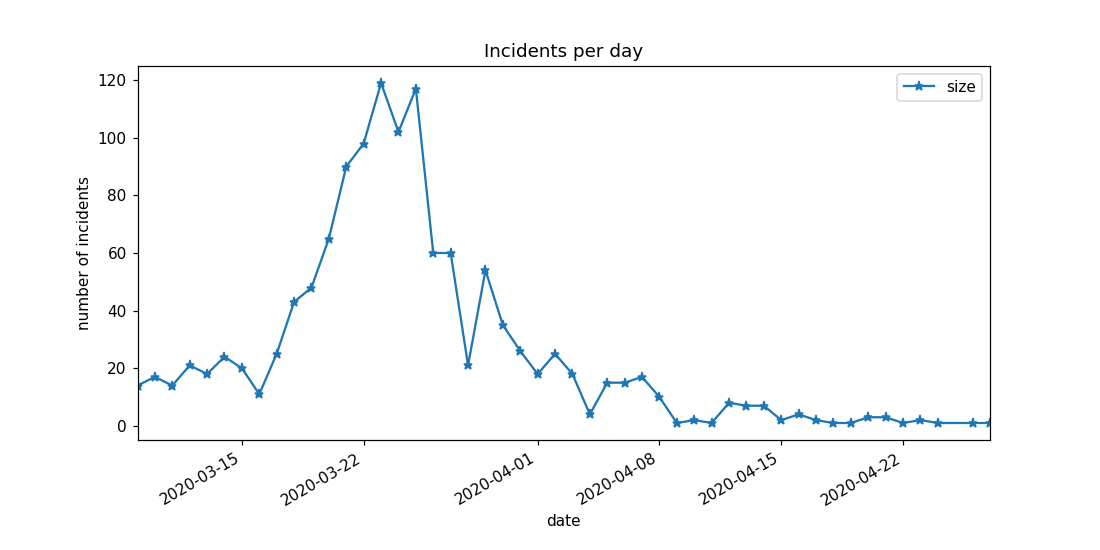

In [35]:
show_stat(incidents_df, 'בני ברק')

['פתח תקווה (פתח תקוה)']


<IPython.core.display.Javascript object>


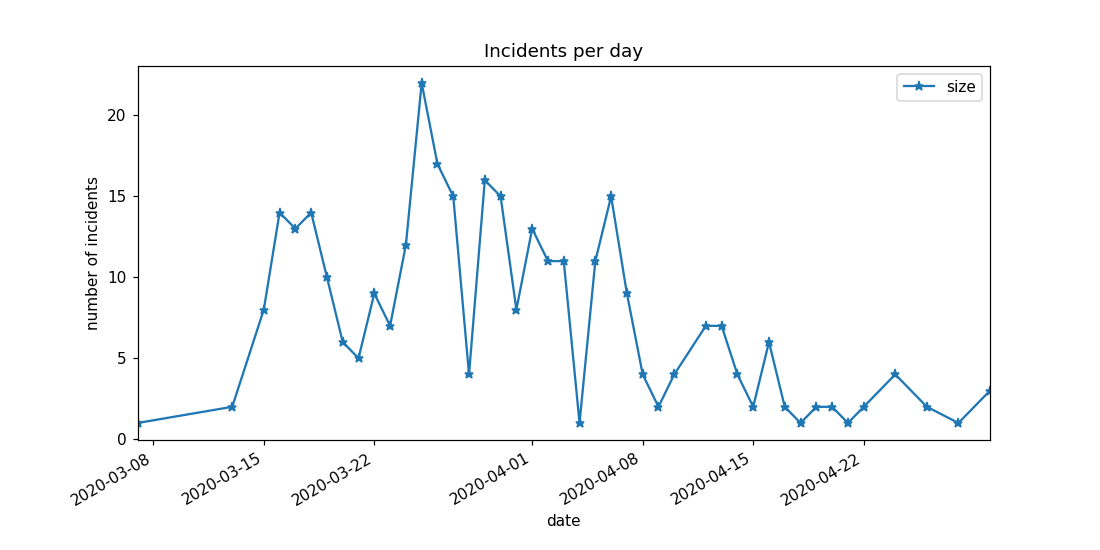

In [37]:
show_stat(incidents_df, 'פתח')

['כפר סבא']


<IPython.core.display.Javascript object>


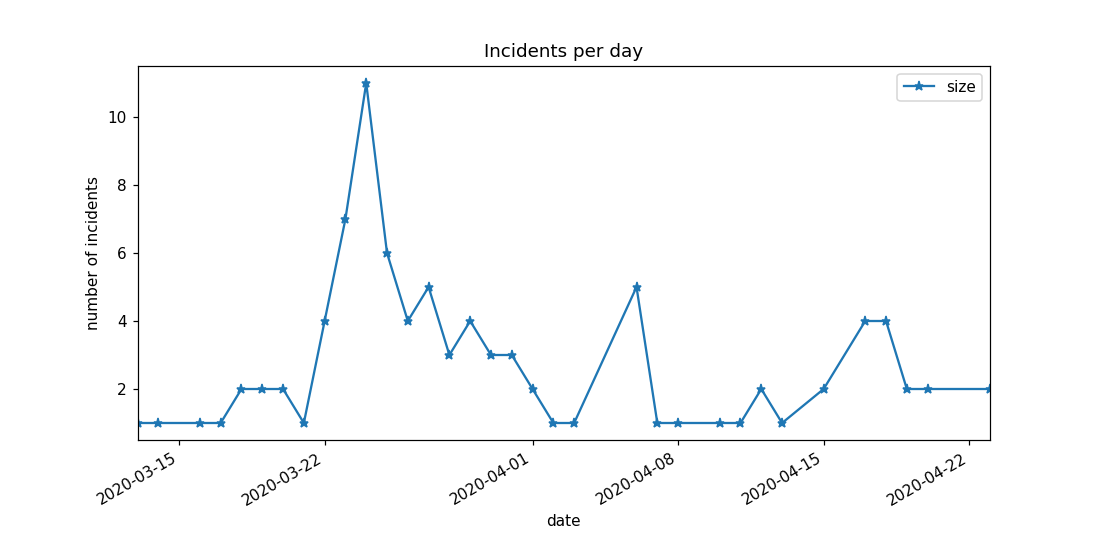

In [36]:
show_stat(incidents_df, 'כפר סבא')

['תל אביב -']


<IPython.core.display.Javascript object>


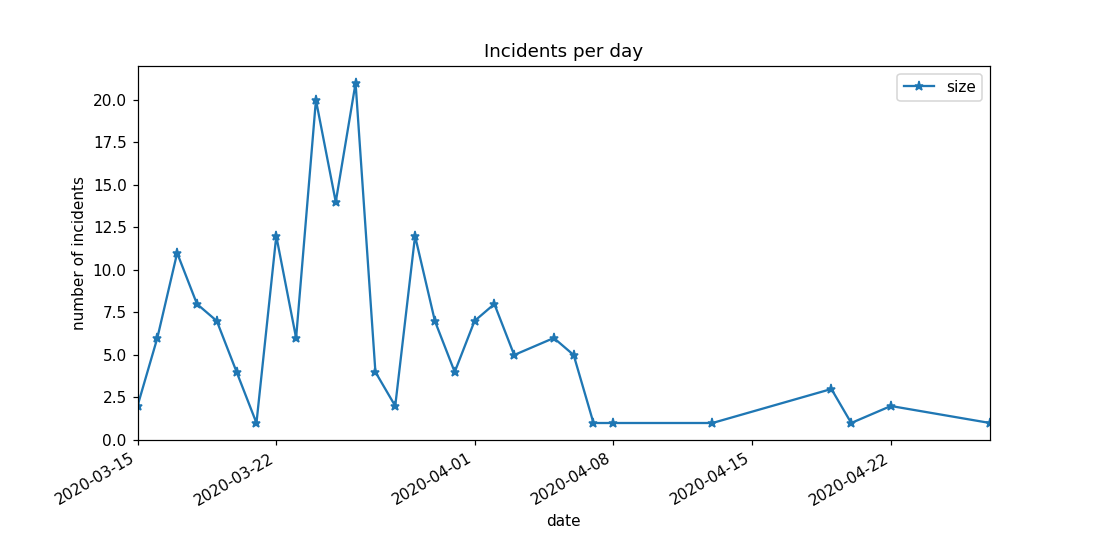

In [38]:
show_stat(incidents_df, 'תל אביב')

['ירושלים והסביבה']


<IPython.core.display.Javascript object>


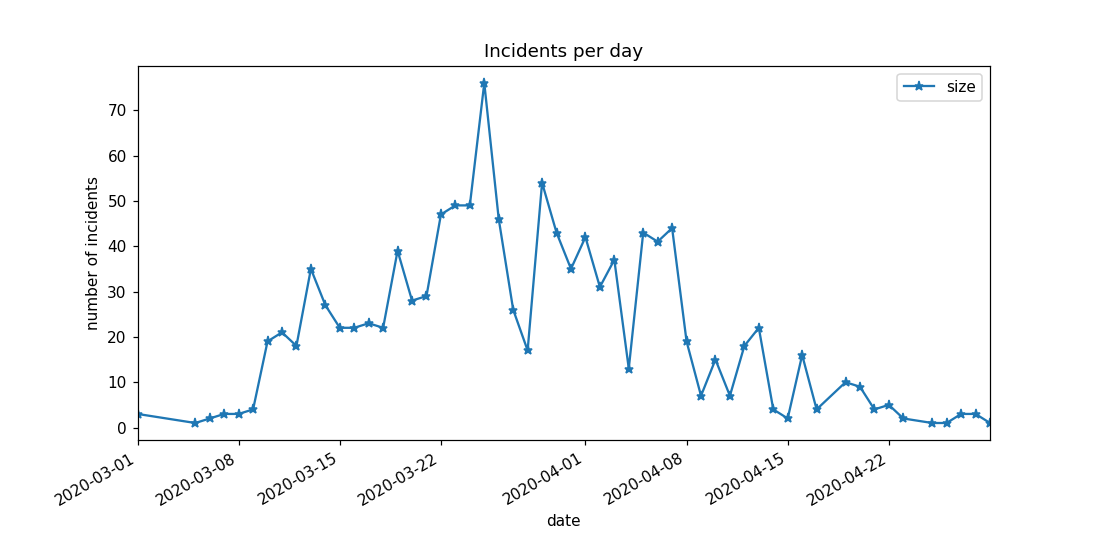

In [39]:
show_stat(incidents_df, 'ירושלים')

['חיפה']


<IPython.core.display.Javascript object>


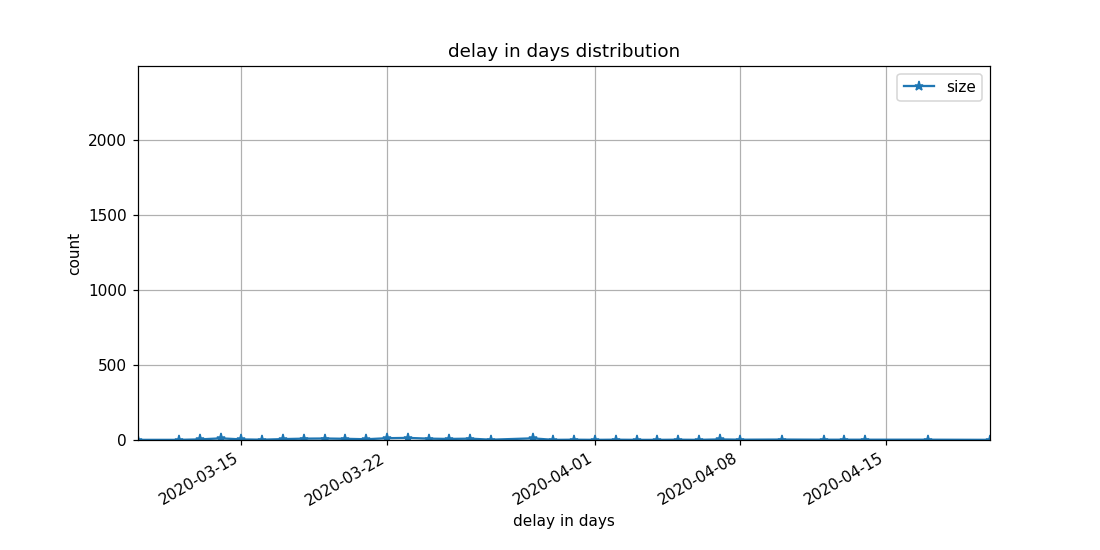

In [40]:
show_stat(incidents_df, 'חיפה')

In [41]:
incidents_df['incident_to_update_days_delay'] = incidents_df['update_date'] - incidents_df['incident_day']
incidents_df.head()

,raw,update_date,incident_day,settlement_name,settlement_link,incident_to_update_days_delay
0,"27.4.20, 17:00-17:30 - סופר עאמד, טייבה",2020-05-02,2020-04-27,טייבה,https://www.gov.il/he/departments/news/tayibe-corona,5 days
1,"26.4.20, 17:00-17:30 - סופר עאמד, טייבה",2020-05-02,2020-04-26,טייבה,https://www.gov.il/he/departments/news/tayibe-corona,6 days
2,"12/04/2020 18:30 - 18:45 בית מרקחת מג'אד פארם, טייבה",2020-04-24,2020-04-12,טייבה,https://www.gov.il/he/departments/news/tayibe-corona,12 days
3,"12/04/2020 18:00 - 18:30 סופר בראון טייבה, אלשל 1, טייבה",2020-04-24,2020-04-12,טייבה,https://www.gov.il/he/departments/news/tayibe-corona,12 days
4,14/04/2020 20:45-21:10 מרכז רפואי אלראזי כביש 26 טייבה טייבה,2020-04-23,2020-04-14,טייבה,https://www.gov.il/he/departments/news/tayibe-corona,9 days


In [42]:
incidents_df['incident_to_update_days_delay'].describe()

count    10915                   
mean     1 days 18:18:49.967934  
std      226 days 19:29:14.798380
min      -6571 days +00:00:00    
25%      7 days 00:00:00         
50%      10 days 00:00:00        
75%      12 days 00:00:00        
max      92 days 00:00:00        
Name: incident_to_update_days_delay, dtype: object

In [43]:
incidents_df.loc[incidents_df['incident_to_update_days_delay'].idxmin()]

raw                              23/03/2020 08:00- 08:00, סופר סל , אופקים           
update_date                      2002-03-27 00:00:00                                 
incident_day                     2020-03-23 00:00:00                                 
settlement_name                  אופקים                                              
settlement_link                  https://www.gov.il/he/departments/news/ofakim-corona
incident_to_update_days_delay    -6571 days +00:00:00                                
Name: 9503, dtype: object

In [44]:
incidents_df.loc[incidents_df['incident_to_update_days_delay'].idxmax()]

raw                              4/1/2020 9:30 - 18:00 הוסטל בית גיא רח' פנחס בן דוד 5       
update_date                      2020-04-05 00:00:00                                         
incident_day                     2020-01-04 00:00:00                                         
settlement_name                  ראשון לציון                                                 
settlement_link                  https://www.gov.il/he/departments/news/-rishon-lezion-corona
incident_to_update_days_delay    92 days 00:00:00                                            
Name: 1822, dtype: object

In [45]:
a = incidents_df['incident_to_update_days_delay'].dt.days
b = a[(a >= 0) & (a < 50)]
b.hist(bins=20)
plt.title('delay in days distribution')
plt.xlabel('delay in days')
plt.ylabel('count')

Text(101.31944706042609, 0.5, 'count')

In [46]:
c = incidents_df.groupby('incident_day')['incident_to_update_days_delay'].apply(lambda x: x.mean()).reset_index()
c['incident_to_update_days_delay'] = c['incident_to_update_days_delay'].dt.days
c.head()

,incident_day,incident_to_update_days_delay
0,2020-01-04,92
1,2020-02-19,33
2,2020-02-24,29
3,2020-02-27,25
4,2020-02-28,24


In [47]:
d = c['incident_to_update_days_delay']
e = c[(d < 50) & (d >= 0)]
e.head()

,incident_day,incident_to_update_days_delay
1,2020-02-19,33
2,2020-02-24,29
3,2020-02-27,25
4,2020-02-28,24
5,2020-02-29,25


<IPython.core.display.Javascript object>


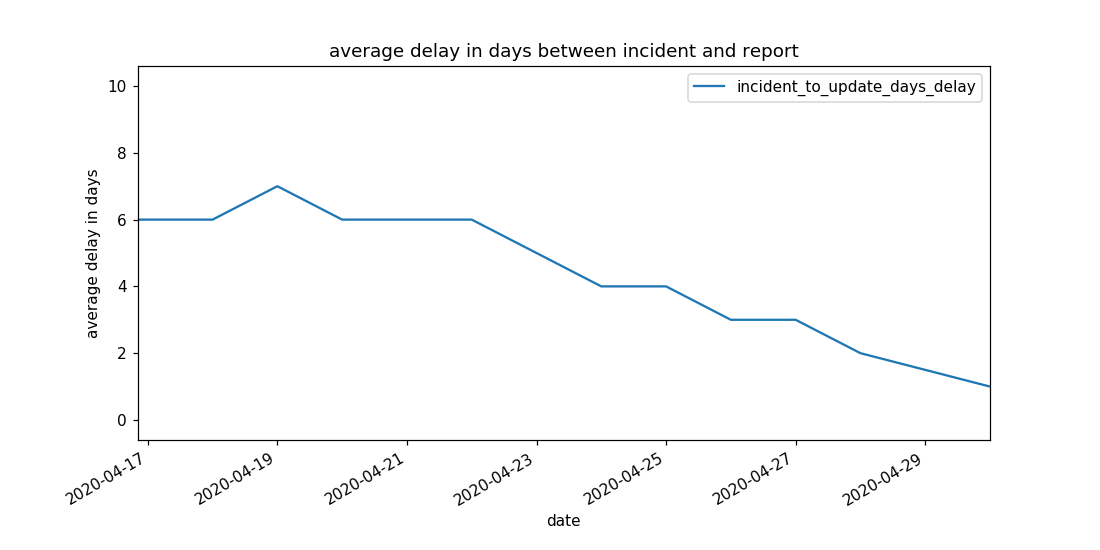

Text(0, 0.5, 'average delay in days')

In [48]:
e.plot(x='incident_day', y='incident_to_update_days_delay')
plt.title('average delay in days between incident and report')
plt.xlabel('date')
plt.ylabel('average delay in days')